# Lab Session #6
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Matthias Inghels, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> Constantijn Coppers (02010771)
<br>
<font color=blue>Academic Year:</font> 2023-2024

<a id="top"></a> 

# Oja Learning

The outline of this exercise follows the theory presented in chapter 19 of "Neuronal Dynamics" by Gerstner, Kistler, Naud, Paninski (2014, Cambridge University Press). (https://neuronaldynamics.epfl.ch/online/Ch19.S2.html) It is possible you need to read some extra information in this chapter that was not seen in the lecture.

## Aim<a id="introduction"></a>

Oja's Rule, a fundamental principle in neural network learning, proposes a method to update synaptic weights in a way that enables the neuron to learn input patterns with statistical regularities. This exercise delves into the application of Oja learning in computational neurophysiology, aiming to understand how neurons adapt to input patterns over time. The primary objective of this exercise is to familiarize students with Oja learning and its implications in modeling neural activity. Through practical implementations and analysis, you will gain insights into how neurons adapt their synaptic weights to input statistics.


### Case Study : Neuronal Adaptation<a id="CS1"></a>

Consider a simplified model of a neuron receiving input from sensory receptors. The neuron's task is to learn the statistical properties of the input patterns over time. We'll simulate this scenario and analyze how Oja learning influences synaptic weight adaptation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Q1: Implementing Oja's Rule <a id="Q1"></a>

Implement Oja's Rule in code. Define a function oja_update that takes a datapoint cloud, initial angle and learn rate eta as input. The initial angle determines the weight initiation as the sine and cosine of that angle. The cloud consists of an N by 2 array. These 2 columns are the respective firing rates of the presynaptic neurons. The function should iterate over the cloud and return the course of weights and the course of the post synaptic outputs while learning.

How will w_course and the output reflect the learning process in a neural context?

* [Fill in answer here](#A1)

#### Q2: Simulating Input Patterns <a id="Q2"></a>

Create the make_cloud function to generate synthetic input patterns resembling sensory stimuli. make_cloud has 3 inputs:
* n: amount of points (v1,v2)
* ratio: elliptic ratio of the points
* angle: angle at which the ellipse is tilted

The neural setup is the following:

<img src = https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/Oja_setup.png width="500">

One linear neuron gets input from two synaptic neurons. Make and plot:

* One circular cloud of datapoints
* One very flat elliptic cloud at an angle of 20 degrees
* One cloud with a ratio and angle of your choice

Describe how w_course will differ using these inputs. (with words, not code)

* [Fill in answer here](#A2)    

#### Q3: Plotting Results <a id="Q3"></a>

Simulate the evolution of synaptic weights over time using Oja's Rule. Use the 3 input clouds you created and plot the synaptic weights' trajectories. Describe how they adapt to the input statistics.

* [Fill in answer here](#A3) 

#### Q4: Convergence Speed<a id="Q4"></a>

Investigate the convergence properties of Oja learning. Experiment with different learning rates and initial synaptic weight configurations. Analyze how these factors affect the convergence speed and final synaptic weight values.

* [Fill in answer here](#A4) 

#### Q5: Non-centered Data<a id="Q5"></a>

Try again, but applying the learning rule on a noncentered data cloud.
What conclusions can you draw? Can you think of a modification to the learning rule?

Hint: make use of the make_cloud function but add a constant to every point in every dimension

* [Fill in answer here](#A5) 

#### Q6: Covariance Learning <a id="Q6"></a>

Write a function covariance_learning and compare the results to Oja learning.

* (a) Do they differ? Why?
* (b) Is there a condition for covariance learning? Why? (in words)

Hint: for (a), vary the learning rates and compare the convergence

* [Fill in answer here](#A6)

#### A1: Implementing Oja's Rule <a id="A1"></a>
* [Go back to Q1](#Q1)

In [2]:
def oja_update(cloud, initial_angle = 45, eta = 1e-3):
    # get size
    n = cloud.shape[0]
    
    # create dummy variable to match theory
    u = cloud
        
    # Convert angle to radians
    initial_angle = np.deg2rad(initial_angle) 
    
    # initialize the weights
    w0 = np.array([np.cos(initial_angle), np.sin(initial_angle)])

    # initialze retrun parameters
    w = np.zeros_like(u)
    v = np.zeros(n)

    # Initial conditions
    w[0] = w0
    v[0] = w0.T @ u[0]
    
    # implement Oja's rule
    for k in range(n-1):
        
        # update the weights
        w[k+1] = w[k] + eta*v[k]*(u[k] - v[k]*w[k])

        # update the output
        v[k+1] = np.dot(w[k+1], cloud[k+1]) 
        
    return w, v

<div class="alert alert-success">
<span style="color:black">

**A1 conclusion** <a id="A1"></a>

- Within the presented network model, the synapses are characterized by the variables $ w_{i3} $, where $ i \in \{1,2\} $, referred to as synaptic strength, synaptic weight, or synaptic efficacy. These variables denote the coupling between the pre-synaptic neurons $ i = 1,2 $ and the post-synaptic neuron 3. In a neuronal context, synaptic plasticity refers to the alteration of synaptic strength over time. Changes induced in the postsynaptic response $ v $ (outlined below) may result in a persistent increase of synaptic strength, known as long-term potentiation (LTP), or conversely, a persistent decrease, termed long-term depression (LTD).

  Mathematically, the adaptation of $ w_{i3} $ is referred to as *learning*, and its dynamics are governed by an appropriate *learning rule*. In the provided code, we employed Oja's learning rule:
  $$ \dot{\mathbf{w}} = \eta v(\mathbf{u} - v \mathbf{w})) \tag{1} $$
  Here, $ \mathbf{w} = (w_{13}, w_{23}) $ represents the synaptic weights, $ \mathbf{u} = (u_1, u_2) $ denotes the firing rates of neuron 1 and 2 respectively, and $ v $ signifies the firing rate of neuron 3. Within equation (1), the term $ v\mathbf{u} $ represents the Hebbian Rule: "fire together, wire together" (as discussed in the slides). Additionally, the term $ -v^2\mathbf{u} $ serves to scale down each synapse. The Oja rule encapsulates *synaptic competition*; as some weights strengthen, others weaken (see [A3](#A3) and [A4](#A4)).

- As previously described, $ v $ represents the firing rate induced by the activity of its pre-synaptic neurons 1 and 2. Mathematically, this relationship is 
  $$ v = \mathbf{w}^T\mathbf{u}. \tag{2} $$
  Hence, the output corresponds to the weighted sum of the activity of the respective pre-synaptic neurons. These weights, reflecting synaptic strengths, evolve according to equation (1).

</span>

#### A2:  Simulating Input Patterns <a id="A2"></a>
* [Go back to Q2](#Q2)   

In [3]:
def make_cloud(n = 2000, ratio = 1, angle = 0):
    """Returns an oriented elliptic
    gaussian cloud of 2D points

    Args:
        n (int, optional): number of points in the cloud
        ratio (int, optional): (std along the short axis) /
            (std along the long axis)
        angle (int, optional): rotation angle [deg]

    Returns:
        numpy.ndarray: array of datapoints
    """

    if ratio > 1.:
        ratio = 1. / ratio

    x = np.random.randn(n, 1)
    y = ratio * np.random.randn(n, 1)
    z = np.concatenate((x, y), 1)
    radangle = (180. - angle) * np.pi / 180.
    transfo = [[np.cos(radangle), np.sin(radangle)],
              [-np.sin(radangle), np.cos(radangle)]]
    
    return np.dot(transfo, z.T).T

In [4]:
def plot_cloud(cloud, ax, title = '', color = '#D3D3D3', alpha = 0.25):

    ax.set_title(title)
    
    ax.scatter(cloud[:,0], cloud[:,1], color = color, alpha = alpha)
    
    ax.axis('equal')
    ax.set_xlabel(r'Firing Rate $\nu_1$')
    ax.set_ylabel(r'Firing Rate $\nu_2$')

In [5]:
# One circular cloud of datapoints
target_circular = 90
circular_cloud = make_cloud(ratio = 1.0, angle = target_circular)

In [6]:
# One very flat elliptic cloud at an angle of 20 degrees
target_flat = 20
flat_cloud = make_cloud(ratio = 100.0, angle = target_flat)

In [7]:
# One cloud with a ratio and angle of your choice
target_choice = 60
choice_cloud = make_cloud(ratio = 0.3, angle = target_choice)

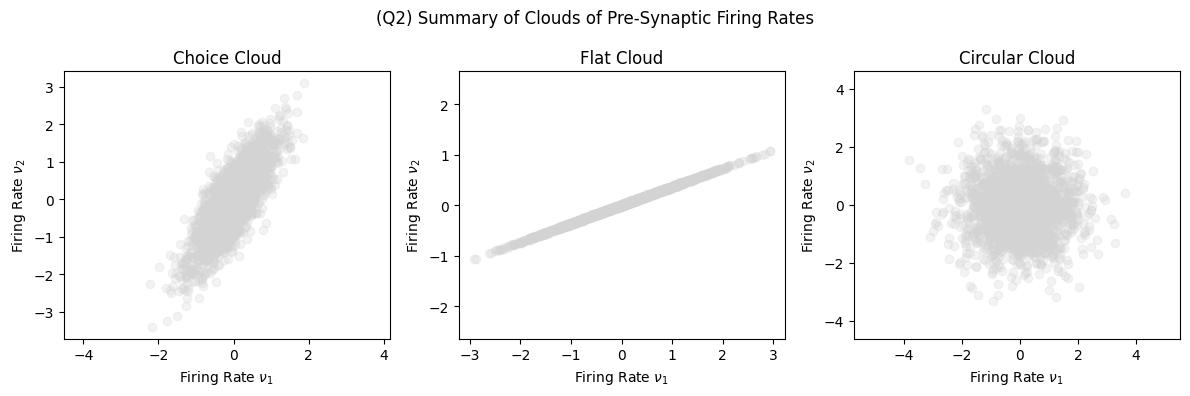

In [8]:
# Make a plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))

plt.suptitle('(Q2) Summary of Clouds of Pre-Synaptic Firing Rates')

plot_cloud(choice_cloud, ax1, title = 'Choice Cloud')
plot_cloud(flat_cloud, ax2, title = 'Flat Cloud')
plot_cloud(circular_cloud, ax3, title = 'Circular Cloud')

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A2 conclusion** <a id="A2"></a>

As elaborated in [Q1](#A1), synaptic competition between neuron 2 and 3 is expected. Hence, we generally expect that the neuron with the highest absolute firing rate will experience the most strengthening (Hebb's Learning Rule), while the synaptic strength of the other neuron will diminish. This outcome is evidently influenced by the parameters `ratio` and `angle`.

- **`choice_cloud`**: With `ratio` set to 0.3 and `angle` to 60 degrees, it implies that $ \nu_2 $ has a larger range compared to $ \nu_1 $ (indicating that $ \nu_2 $ generally has higher absolute values than $ \nu_1 $) and there exists a positive relationship between $ \nu_1 $ and $ \nu_2 $. Consequently, we anticipate that after a transient period, $| w_{23} |$ (more stimulation $ \rightarrow $ strengthening) will surpass $ |w_{13}| $ (less stimulation $ \rightarrow $ weakening)$^1$.

- **`flat_cloud`**: In this scenario, with `ratio` $ \ggg $ 1 and `angle` = 20, neuron 1 is expected to provide more (positive or negative, depending on the initial angle) stimulation than neuron 2. Hence, we anticipate a greater strengthening of $ | w_{13} | $ compared to $ | w_{23} | $. Unlike the **`choice_cloud`**, there is a more pronounced positive correlation, resulting in less variability in $ w_{13} $ and $ w_{23} $ (e.g., if $ \nu_2 \approx 0.5 $, $ \nu_1 $ is already around 2.5).

- **`circular_cloud`**: In this instance, there is no clear correlation between $ \nu_1 $ and $ \nu_2 $, implying that they equally stimulate neuron 3. Consequently, we anticipate high variability in $ w_{13} $ and $ w_{23} $.

$^1$Note that we are using absolute values to make conclusion about the strengthning of the weights. Depending on the inital angle of the simulation , one gets 'positive' or 'negative' strengthning, as will become clear in the latter (see [A4](#A4)). Basically, here, strengthning means that the weight becomes higher in absolute value and weakening the opposite.
</span>

#### A3: Plotting Results  <a id="A3"></a>
* [Go back to Q3](#Q3)   

In [9]:
# simulation parameters
lr = 0.05

# simulate Oja's rule
w_circular1, out_circular1 = oja_update(circular_cloud, eta = lr)
w_flat1, out_flat1 = oja_update(flat_cloud, eta = lr)
w_choice1, out_choice1 = oja_update(choice_cloud, eta = lr)

In [10]:
def plot_weights(w, ax, title = ''):

    ax.set_title(title)
    ax.plot(w[:,0], label = r'$w_{13}$')
    ax.plot(w[:,1], label = r'$w_{23}$')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Weight')

    ax.legend()

In [11]:
def plot_trajectory(u, w, ax, title = ''):

    # plot the cloud 
    plot_cloud(u, ax, title)
    
    t = np.arange(len(w))
    colors = plt.cm.viridis(t / len(t))
    sm = plt.cm.ScalarMappable(
        cmap = plt.cm.viridis,
        norm = plt.Normalize(vmin = 0, vmax = len(u)))
    
    sm.set_array(t)
    cb = fig.colorbar(sm, ax=ax)
    cb.set_label("Iteration")
    ax.scatter(w[:, 0], w[:, 1], facecolor = colors, edgecolor = 'none', lw = 1.5)

    # ensure rectangular plot
    x_min = u[:, 0].min()
    x_max = u[:, 0].max()
    
    y_min = u[:, 1].min()
    y_max = u[:, 1].max()
    lims = [min(x_min, y_min), max(x_max, y_max)]

    ax.set_xlim(lims)
    ax.set_ylim(lims)
    #ax.legend()


In [12]:
def plot_angle(w, target, ax, title = ''):
    
    phi = np.rad2deg(np.arctan2(w[:,1], w[:,0]))


    ax.plot(phi)

    ax.set_xlabel('Iteration')
    ax.set_ylabel(r'Angle of $\mathrm{w}$ (deg)')

    ax.axhline(y = -180 + target, color = 'red', ls = '--', label = 'target angle')
    ax.axhline(y = target, color = 'red', ls = '--')

    ax.set_title(title)
    
    ax.legend()

In [13]:
def plot_output(v, ax, title = ''):

    ax.plot(v)

    ax.set_title(title)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Output $v$')
    
    

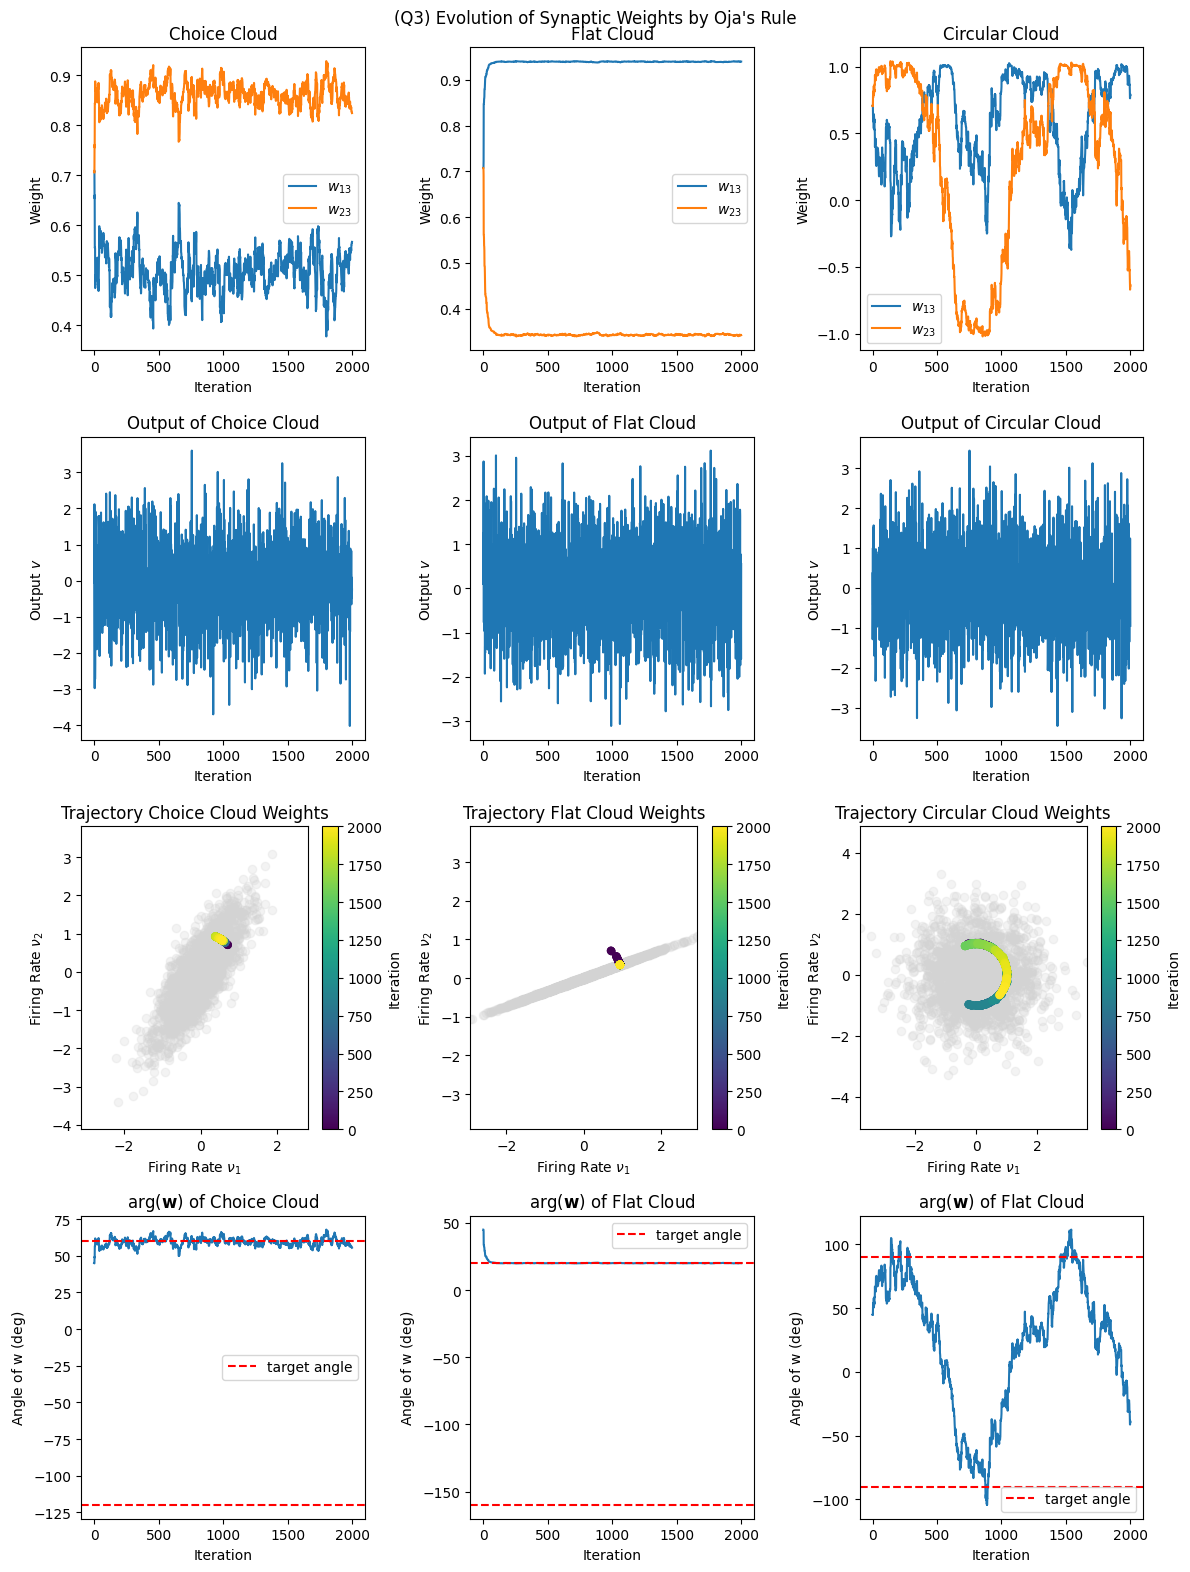

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize = (12, 4 * 4))

plt.suptitle('(Q3) Evolution of Synaptic Weights by Oja\'s Rule')

plot_weights(w_choice1, ax1[0], title = 'Choice Cloud')
plot_weights(w_flat1, ax1[1], title = 'Flat Cloud')
plot_weights(w_circular1, ax1[2], title = 'Circular Cloud')

plot_output(out_choice1, ax2[0], title = 'Output of Choice Cloud')
plot_output(out_flat1, ax2[1], title = 'Output of Flat Cloud')
plot_output(out_circular1, ax2[2], title = 'Output of Circular Cloud')


plot_trajectory(choice_cloud, w_choice1, ax3[0], title = 'Trajectory Choice Cloud Weights')
plot_trajectory(flat_cloud, w_flat1, ax3[1], title = 'Trajectory Flat Cloud Weights')
plot_trajectory(circular_cloud, w_circular1, ax3[2], title = 'Trajectory Circular Cloud Weights')

plot_angle(w_choice1, target_choice, ax4[0], title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Choice Cloud')
plot_angle(w_flat1, target_flat, ax4[1], title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud')
plot_angle(w_circular1, target_circular, ax4[2], title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud')


plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">
    
**A3 conclusion** <a id="A3"></a>

- Upon analyzing the plots in the first row of the figure above, it becomes evident that the arguments presented in [A2](#A2) are valid. In the choice cloud, the weights oscillate around a 'target' value due to the variability inherent in that cloud. Notably, $ | w_{23} | > | w_{13} | $, which aligns with expectations. However, in the flat cloud, the variability is significantly lower, and both weights distinctly converge to stable values. Conversely, the circular cloud exhibits large oscillations in the weights, a consequence of both neurons equally stimulating neuron 3.

- From the trajectory plots depicted above, it is apparent that the weight vector is normalized: $ ||\mathbf{w}||\equiv 1 $. For `w_choice` and `w_flat`, the weight trajectory commences from its initial point and traverses along the unit circle until reaching a stable point$^2$; the intersection of the main axis of the ellipse with the unit circle. However, in the case of the circular cloud, the `w_circular` trajectory lacks a stable point, hence it continues to move (oscillate) around the unit circle.


- The same arguments as stated in the bullet point above can bee observed on the plots of $\mathrm{arg}(\mathbf{w})$. In both the Choice cloud and Flat cloud, $\mathrm{arg}(\mathbf{w})$ clearly evoluates towards a target value. This in contrast to the Circular cloud inputs. We will discuss this further in [A4](#A4).

$^1$ This property is inherent to Oja's rule.\
$^2$ Technically, a *critically*-stable point would be more accurate here. The arguments of the weightvector ($\arg{\mathbf{w}}$) of the simulation with the `choice_cloud` as inputs exhibit some oscillatory behavior around their target angle, indicating that the point is not *truly* stable in that sense. On the other hand, the variations around the target angle of the argument of the synaptic weights of the simulation with the `flat_cloud` inputs are so small that it can be considered *quasi* stable. Furthermore, we will use stability in the broadest sense; a system is either (critically, quasi, or fully) stable or unstable.
</span>

#### A4: Convergence Speed <a id="A4"></a>
* [Go back to Q4](#Q4)   

In [15]:
# variabels
learning_rates = [0.01, 0.05, 0.1, 0.5]
initial_angles = [-10.0, 30.0, 150.0, 250]

In [16]:
# simulations with varying learning rates
ang = 30
circular_sims_lr = [oja_update(circular_cloud, eta = lr, initial_angle = ang)[0] for lr in learning_rates] 
flat_sims_lr = [oja_update(flat_cloud, eta = lr, initial_angle = ang)[0] for lr in learning_rates] 
choice_sims_lr = [oja_update(choice_cloud, eta = lr,  initial_angle = ang)[0] for lr in learning_rates] 

C:\Users\coppe\AppData\Local\Temp\ipykernel_17496\41195118.py:26: RuntimeWarning: overflow encountered in multiply
  w[k+1] = w[k] + eta*v[k]*(u[k] - v[k]*w[k])


In [17]:
# simulations with varying 
lr_ = learning_rates[1]
circular_sims_ang = [oja_update(circular_cloud, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 
flat_sims_ang = [oja_update(flat_cloud, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 
choice_sims_ang = [oja_update(choice_cloud, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 

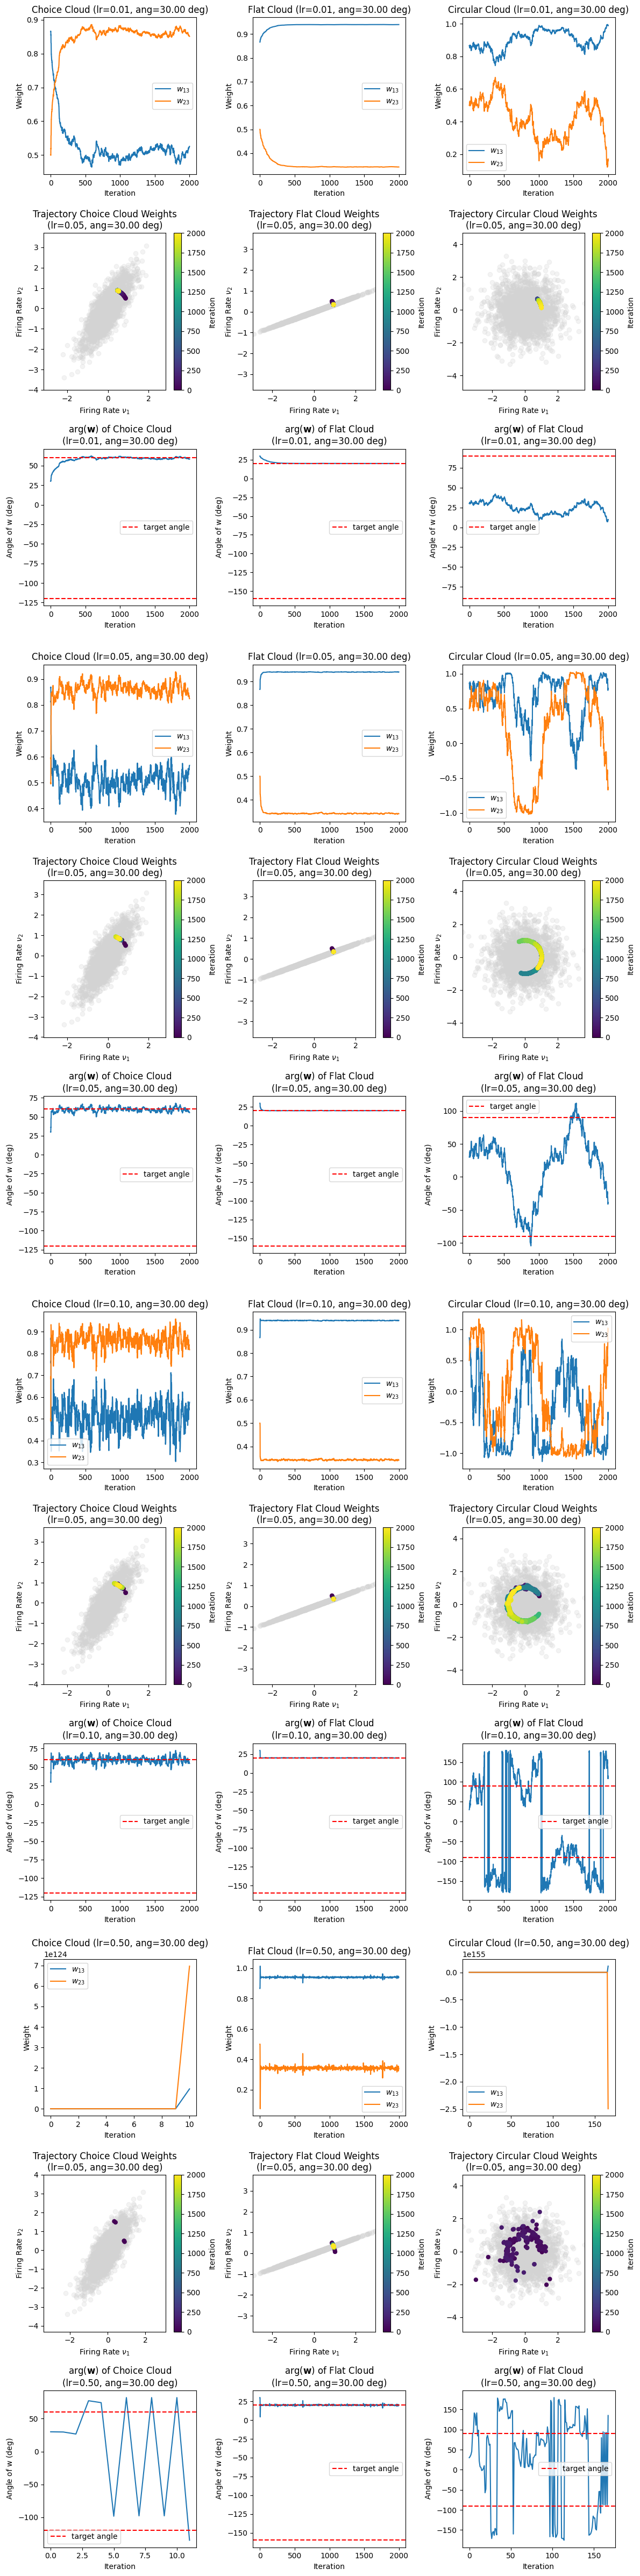

In [18]:
# plot the results of the varying learning rates
N = len(learning_rates)
fig, axs = plt.subplots(N*3, 3, figsize = (12, 4*N*3))

# plt.suptitle('(Q4.1) Varying Learning Rates')


for i in range(0, N*3, 3):
    lr = learning_rates[i//3]
    
    ax1, ax2, ax3 = [axs[i, k] for k in range(3)]
    ax4, ax5, ax6 = [axs[i+1, k] for k in range(3)]
    ax7, ax8, ax9 = [axs[i+2, k] for k in range(3)]
    
    w_circular = circular_sims_lr[i//3]
    w_flat = flat_sims_lr[i//3]
    w_choice = choice_sims_lr[i//3]
    
    # weights
    plot_weights(w_choice, ax1, title = 'Choice Cloud ' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_flat, ax2, title = 'Flat Cloud ' +  f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_circular, ax3, title = 'Circular Cloud ' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')

    plot_trajectory(choice_cloud, w_choice, ax4, title = 'Trajectory Choice Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(flat_cloud, w_flat, ax5, title = 'Trajectory Flat Cloud Weights\n' +  f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(circular_cloud, w_circular, ax6, title = 'Trajectory Circular Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')

    plot_angle(w_choice, 60, ax = ax7, title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Choice Cloud\n' + f'(lr={lr:.2f}, ang={ang:.2f} deg)' )
    plot_angle(w_flat, 20, ax = ax8, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_angle(w_circular, 90, ax = ax9, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')


plt.tight_layout()
plt.show()

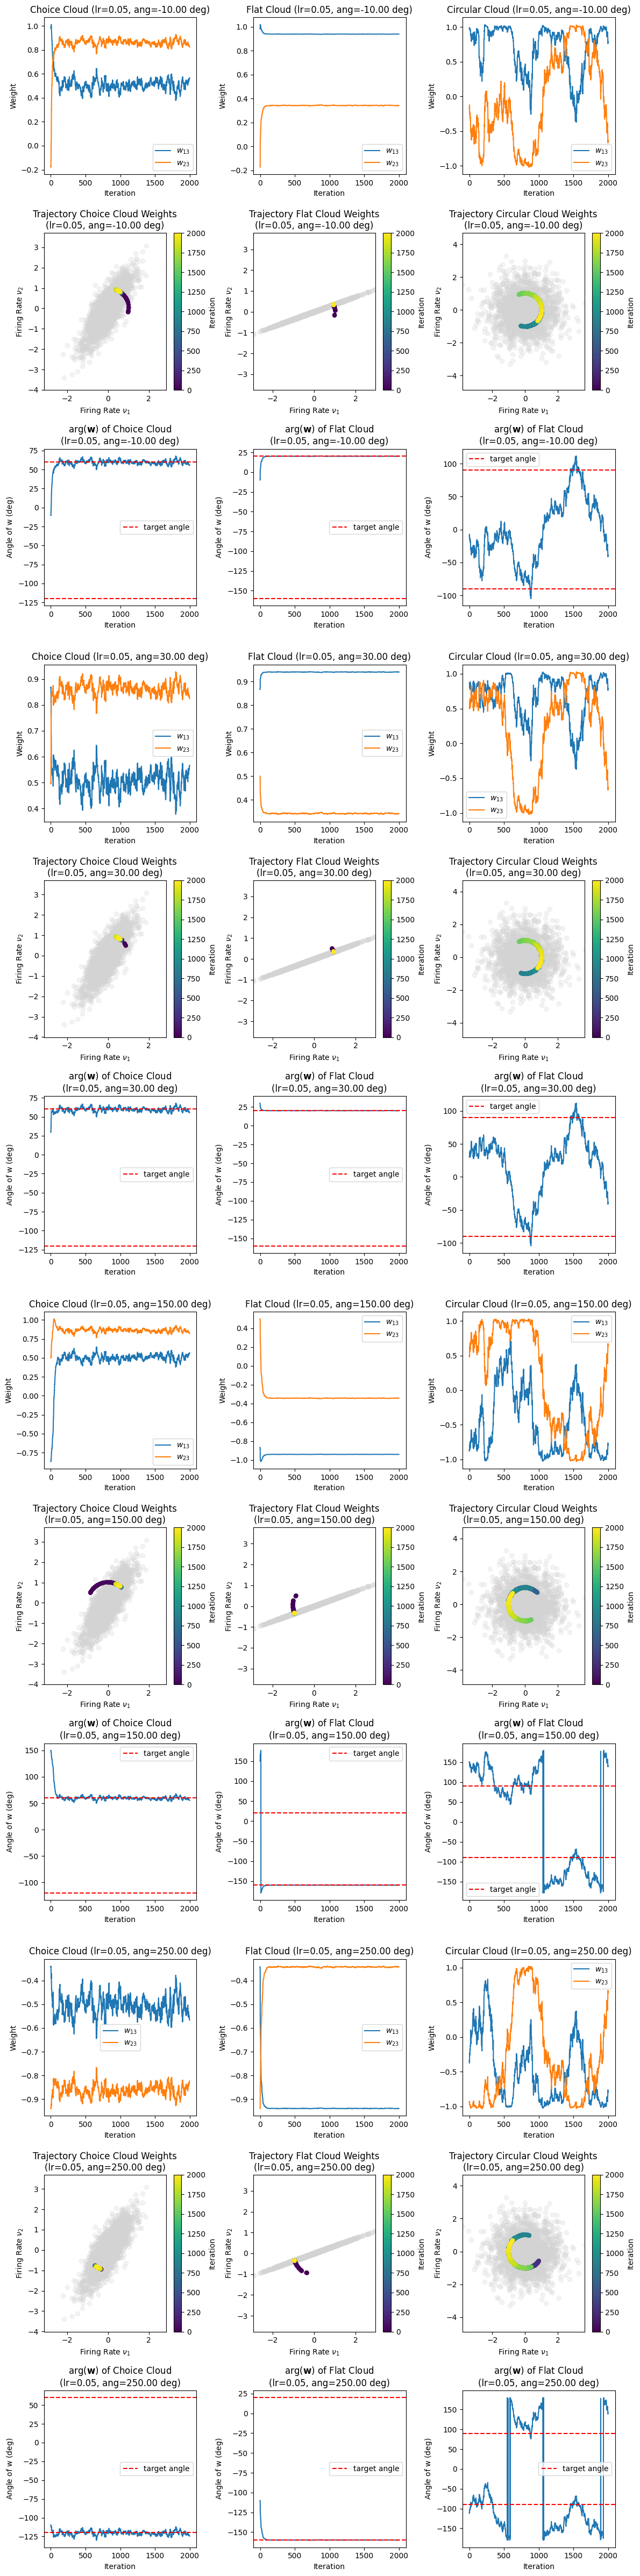

In [19]:
# plot the results of the varying angles
N = len(learning_rates)
fig, axs = plt.subplots(N*3, 3, figsize = (12, 4*N*3))

# plt.suptitle('(Q4.2) Varying Initial Seeds')


for i in range(0, N*3, 3):
    ang = initial_angles[i//3]
    
    ax1, ax2, ax3 = [axs[i, k] for k in range(3)]
    ax4, ax5, ax6 = [axs[i+1, k] for k in range(3)]
    ax7, ax8, ax9 = [axs[i+2, k] for k in range(3)]
    
    w_circular = circular_sims_ang[i//3]
    w_flat = flat_sims_ang[i//3]
    w_choice = choice_sims_ang[i//3]
    
    # weights
    plot_weights(w_choice, ax1, title = 'Choice Cloud ' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_flat, ax2, title = 'Flat Cloud ' +  f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_circular, ax3, title = 'Circular Cloud ' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')

    plot_trajectory(choice_cloud, w_choice, ax4, title = 'Trajectory Choice Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(flat_cloud, w_flat, ax5, title = 'Trajectory Flat Cloud Weights\n' +  f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(circular_cloud, w_circular, ax6, title = 'Trajectory Circular Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')

    plot_angle(w_choice, 60, ax = ax7, title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Choice Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)' )
    plot_angle(w_flat, 20, ax = ax8, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_angle(w_circular, 90, ax = ax9, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A4 conclusion** 

- **Learning Rates**:
  In summary, larger learning rates can accelerate the convergence of synaptic weights, albeit at the expense of stability. With a very small learning rate, weights take longer to reach their target values, but the solution is stable; the plot of weights per iteration exhibits less variability around their target values. Increasing the learning rate accelerates learning, as weights require fewer iterations to evolve towards their target values. However, if the learning rate is excessively large, weights may fail to converge to their local minimum. Instead, the model may diverge ($ ||\mathbf{w}||\equiv 1 $ is no longer satisfied).

- **Initial Angles**:
  The eigendecomposition of the corresponding data cloud yields the ellipsoid's axes (i.e., the eigenvectors $ \mathbf{e}_1 $ and $ \mathbf{e}_2 $) and their corresponding magnitudes (i.e., the eigenvalues $\lambda_1$ and $\lambda_2$ respectively). In cases where $\lambda_1 > \lambda_2$, there exists a preferred direction, namely the direction of the eigenvector $ \mathbf{e}_1 $ corresponding to the highest (absolute) eigenvalue $\lambda_1$. Consequently, the weight vector $ \mathbf{w} $ tends to align parallel or antiparallel to $ \mathbf{e}_1 $. As observed in the plots, the orientation, whether parallel or antiparallel, is determined by the initial angle of the simulation. The synaptic strength $ \mathbf{w} $ will adopt the orientation closest to the initial angle. For instance, in the `choice_cloud` with an initial angle of 30°, the local minimum of the target angle 60° exerts more influence than the local minimum of -120°. Conversely, choosing an initial angle closer to -120° will likely lead $ \mathbf{w} $ to converge towards it.
  
  Moreover, in cases where $\lambda_1 = \lambda_2$, there is no preferred direction, causing $ \mathbf{w} $ to oscillate between both axes. Each direction equally influences $ \mathbf{w} $, as observed in the plots with `circular_cloud` as input.
  
</span>

#### A5: Non-centered Data  <a id="A5"></a>
* [Go back to Q5](#Q5) 

In [30]:
# get the translation vector
r1, r2 = [np.random.randint(3) for _ in range(2)]
print('Translation Vector:', r1, ',', r2)

# get the datapoints
choice_cloud_unc = (r1, r2) + choice_cloud
flat_cloud_unc = (r1, r2) + flat_cloud
circular_cloud_unc = (r1, r2) + circular_cloud

Translation Vector: 0 , 1


In [31]:
# simulations with varying learning rates
ang = 30
circular_sims_lr_unc = [oja_update(circular_cloud_unc, eta = lr, initial_angle = ang)[0] for lr in learning_rates] 
flat_sims_lr_unc = [oja_update(flat_cloud_unc, eta = lr, initial_angle = ang)[0] for lr in learning_rates] 
choice_sims_lr_unc = [oja_update(choice_cloud_unc, eta = lr,  initial_angle = ang)[0] for lr in learning_rates] 

In [32]:
# simulations with varying lr
lr_ = 1e-3
circular_sims_ang_unc = [oja_update(circular_cloud_unc, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 
flat_sims_ang_unc = [oja_update(flat_cloud_unc, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 
choice_sims_ang_unc = [oja_update(choice_cloud_unc, eta = lr_, initial_angle = ang)[0] for ang in initial_angles] 

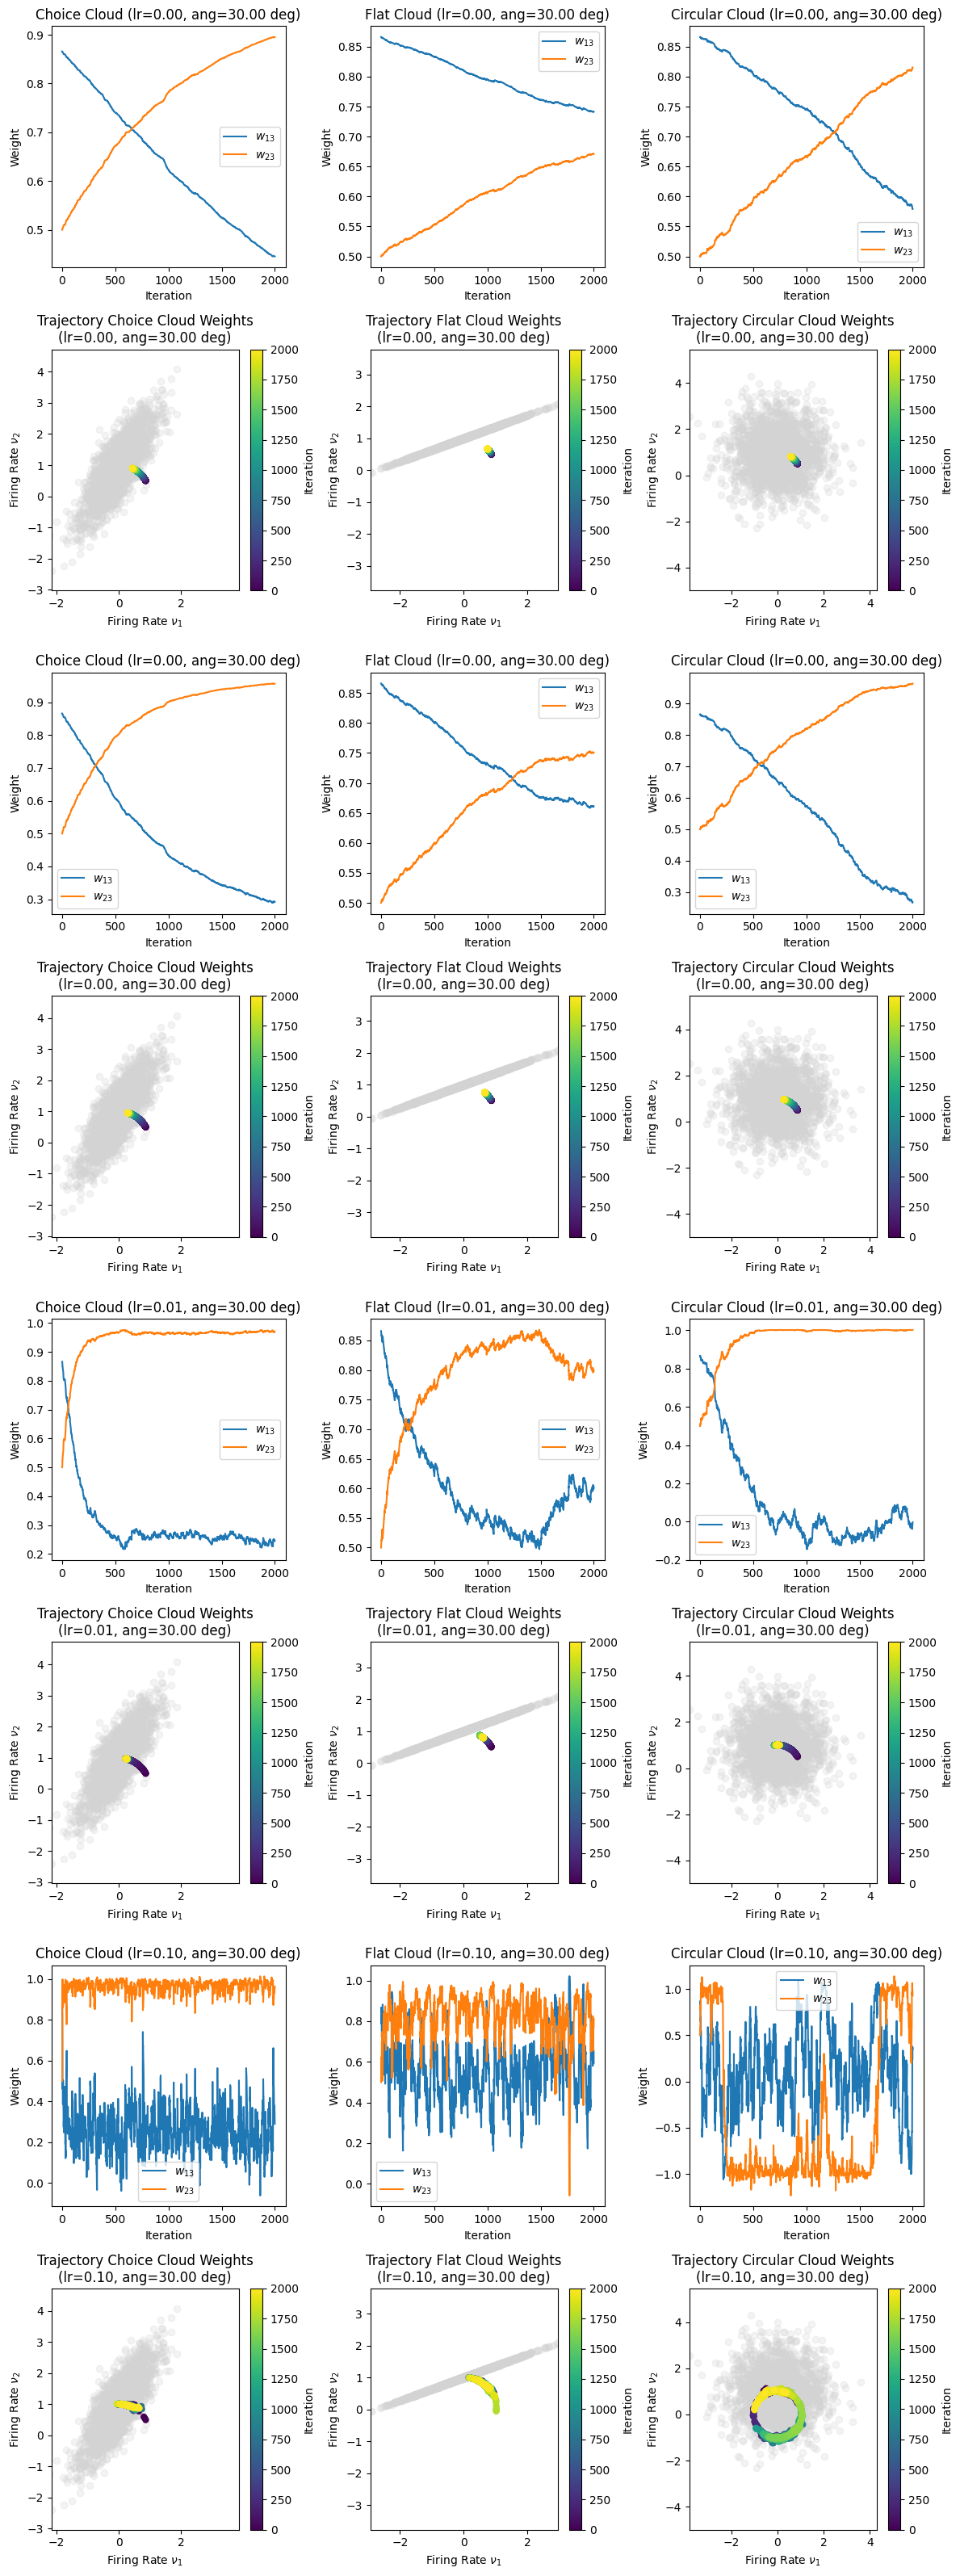

In [33]:
# plot the results of the varying learning rates
N = len(learning_rates)
fig, axs = plt.subplots(N*2, 3, figsize = (12, 4*N*2))

# plt.suptitle('(Q4.1) Varying Learning Rates')


for i in range(0, N*2, 2):
    lr = learning_rates[i//2]
    
    ax1, ax2, ax3 = [axs[i, k] for k in range(3)]
    ax4, ax5, ax6 = [axs[i+1, k] for k in range(3)]
    
    w_circular = circular_sims_lr_unc[i//2]
    w_flat = flat_sims_lr_unc[i//2]
    w_choice = choice_sims_lr_unc[i//2]
    
    # weights
    plot_weights(w_choice, ax1, title = 'Choice Cloud ' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_flat, ax2, title = 'Flat Cloud ' +  f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_circular, ax3, title = 'Circular Cloud ' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')

    plot_trajectory(choice_cloud_unc, w_choice, ax4, title = 'Trajectory Choice Cloud Weights\n' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(flat_cloud_unc, w_flat, ax5, title = 'Trajectory Flat Cloud Weights\n' +  f'(lr={lr:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(circular_cloud_unc, w_circular, ax6, title = 'Trajectory Circular Cloud Weights\n' + f'(lr={lr:.2f}, ang={ang:.2f} deg)')


plt.tight_layout()
plt.show()

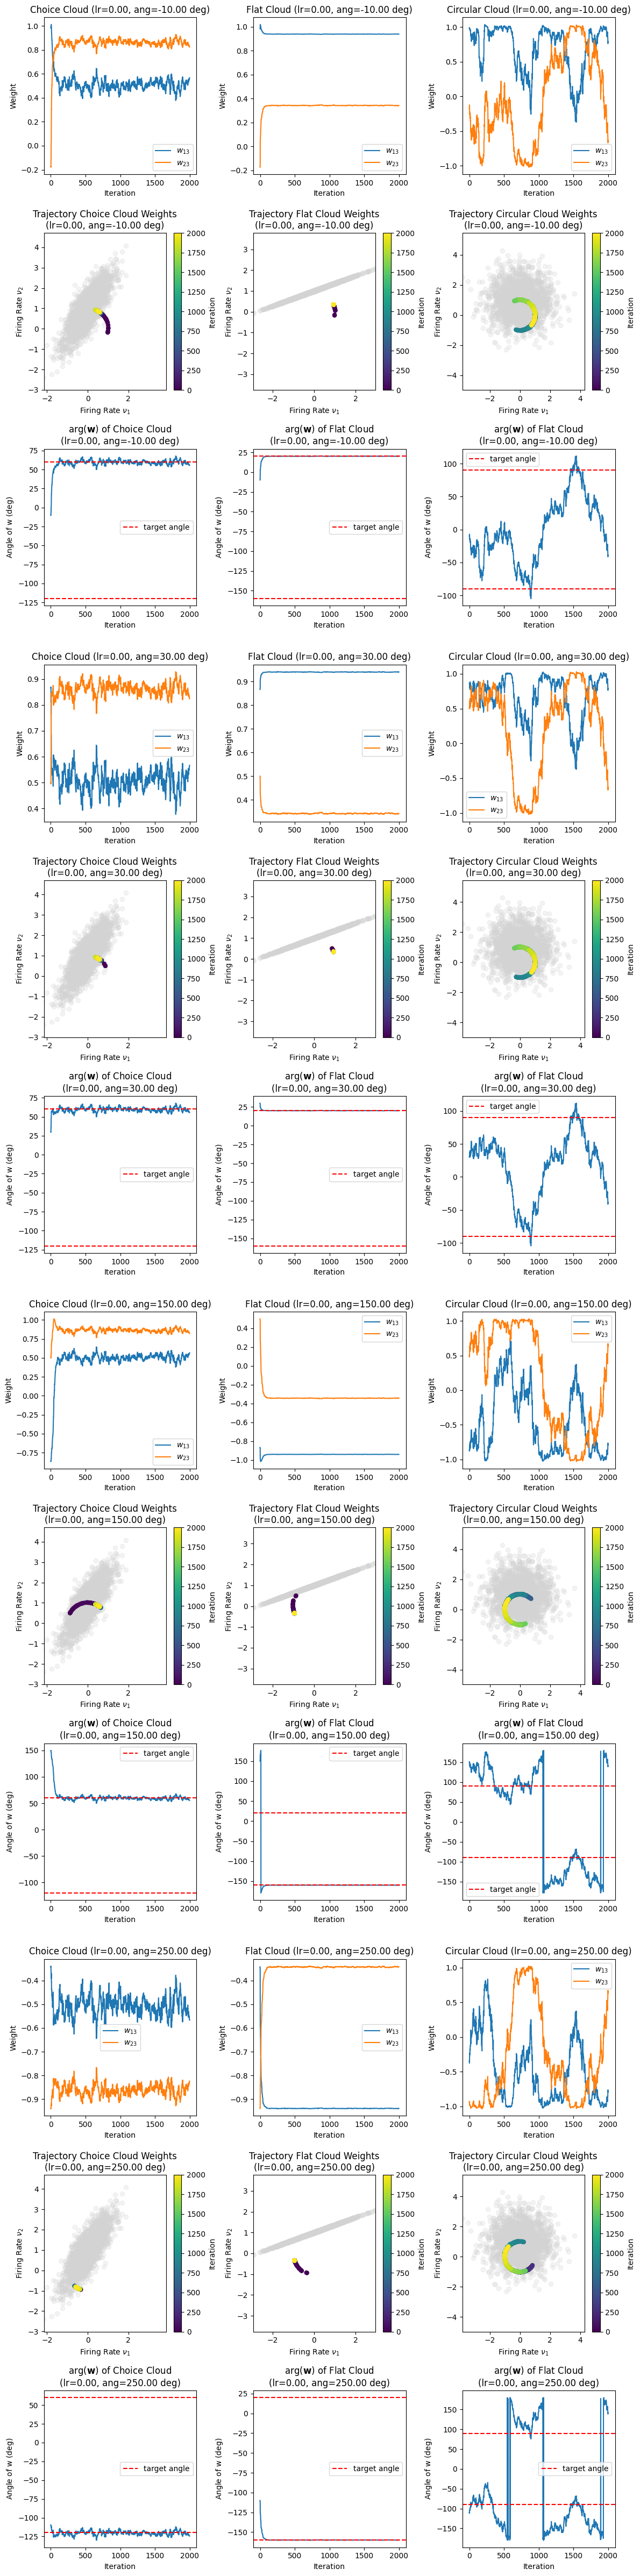

In [34]:
# plot the results of the varying angles
N = len(learning_rates)
fig, axs = plt.subplots(N*3, 3, figsize = (12, 4*N*3))

# plt.suptitle('(Q4.2) Varying Initial Seeds')


for i in range(0, N*3, 3):
    ang = initial_angles[i//3]
    
    ax1, ax2, ax3 = [axs[i, k] for k in range(3)]
    ax4, ax5, ax6 = [axs[i+1, k] for k in range(3)]
    ax7, ax8, ax9 = [axs[i+2, k] for k in range(3)]
    
    w_circular = circular_sims_ang[i//3]
    w_flat = flat_sims_ang[i//3]
    w_choice = choice_sims_ang[i//3]
    
    # weights
    plot_weights(w_choice, ax1, title = 'Choice Cloud ' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_flat, ax2, title = 'Flat Cloud ' +  f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_weights(w_circular, ax3, title = 'Circular Cloud ' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')

    plot_trajectory(choice_cloud_unc, w_choice, ax4, title = 'Trajectory Choice Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(flat_cloud_unc, w_flat, ax5, title = 'Trajectory Flat Cloud Weights\n' +  f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_trajectory(circular_cloud_unc, w_circular, ax6, title = 'Trajectory Circular Cloud Weights\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')

    plot_angle(w_choice, 60, ax = ax7, title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Choice Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)' )
    plot_angle(w_flat, 20, ax = ax8, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    plot_angle(w_circular, 90, ax = ax9, title =  r'$\mathrm{arg}(\mathbf{w})$' + ' of Flat Cloud\n' + f'(lr={lr_:.2f}, ang={ang:.2f} deg)')
    
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A5 conclusion** 

When applying Oja's learning rule to a non-centered data cloud, the learned weights may be biased towards the center of the cloud. This bias occurs because the learning rule does not account for the mean of the data cloud. Consequently, the weights fail to converge to their correct values.

To address this issue and ensure accurate weight optimization, a modification to the learning rule can be made. By subtracting the mean of the data cloud from the pre-synaptic firing rates before applying the learning rule, the data is centered around the origin. This modification allows the learning rule to update in the correct direction for subsequent iterations. If the final result is desired for the non-centered data cloud, the mean can be added again after applying Oja's rule.
</span>

#### A6: Covariance Learning  <a id="A6"></a>
* [Go back to Q6](#Q6)   

In [35]:
def covariance_learn(cloud, eta, initial_angle = 45, rule = '1'):
    # get parameters
    n = cloud.shape[0]
    
    # make dummy variables ot match theory
    u = cloud
        
    # Convert angle to radians
    initial_angle = np.deg2rad(initial_angle)
    
    # initialize the weights
    w0 = np.array([np.cos(initial_angle), np.sin(initial_angle)])

    # initialze retrun parameters
    w = np.zeros_like(cloud)
    v = np.zeros(n)

    # Initial conditions
    w[0] = w0
    v[0] = w0.T @ u[0]
    #print('Initial Conditions:', w[0], v[0])

    # Mean activity
    u_mean = u.mean(axis = 0)
    #print('Mean Acivity inputs', u_mean)
    
    # implement Oja's rule
    for k in range(n-1):
        
        # update the weights by Covariance Rule
        if rule == '1':
            w[k+1] = w[k] + eta*np.outer(u[k], (u[k] - u_mean).T) @ w[k]
        elif rule == '2':
            w[k+1] = w[k] + eta*np.cov(u[k] - u_mean, u[k] - u_mean) @ w[k]
        else:
            w[k+1] = w[k] + eta*v[k] * (u[k] - u_mean) 

        # update the output
        v[k+1] = np.dot(w[k+1],  u[k+1])
    
    return w, v


In [36]:
# run the simulations with varying lr
learning_rates = [0.5e-3, 1e-3, 5e-3, 0.1]
sims = [covariance_learn(choice_cloud, eta = lr, initial_angle = 45, rule = '1')[0] for lr in learning_rates]

In [37]:
# uncentered data
lr = learning_rates[1]
sim_unc = covariance_learn(choice_cloud_unc, eta = lr, initial_angle = 45, rule = '1')

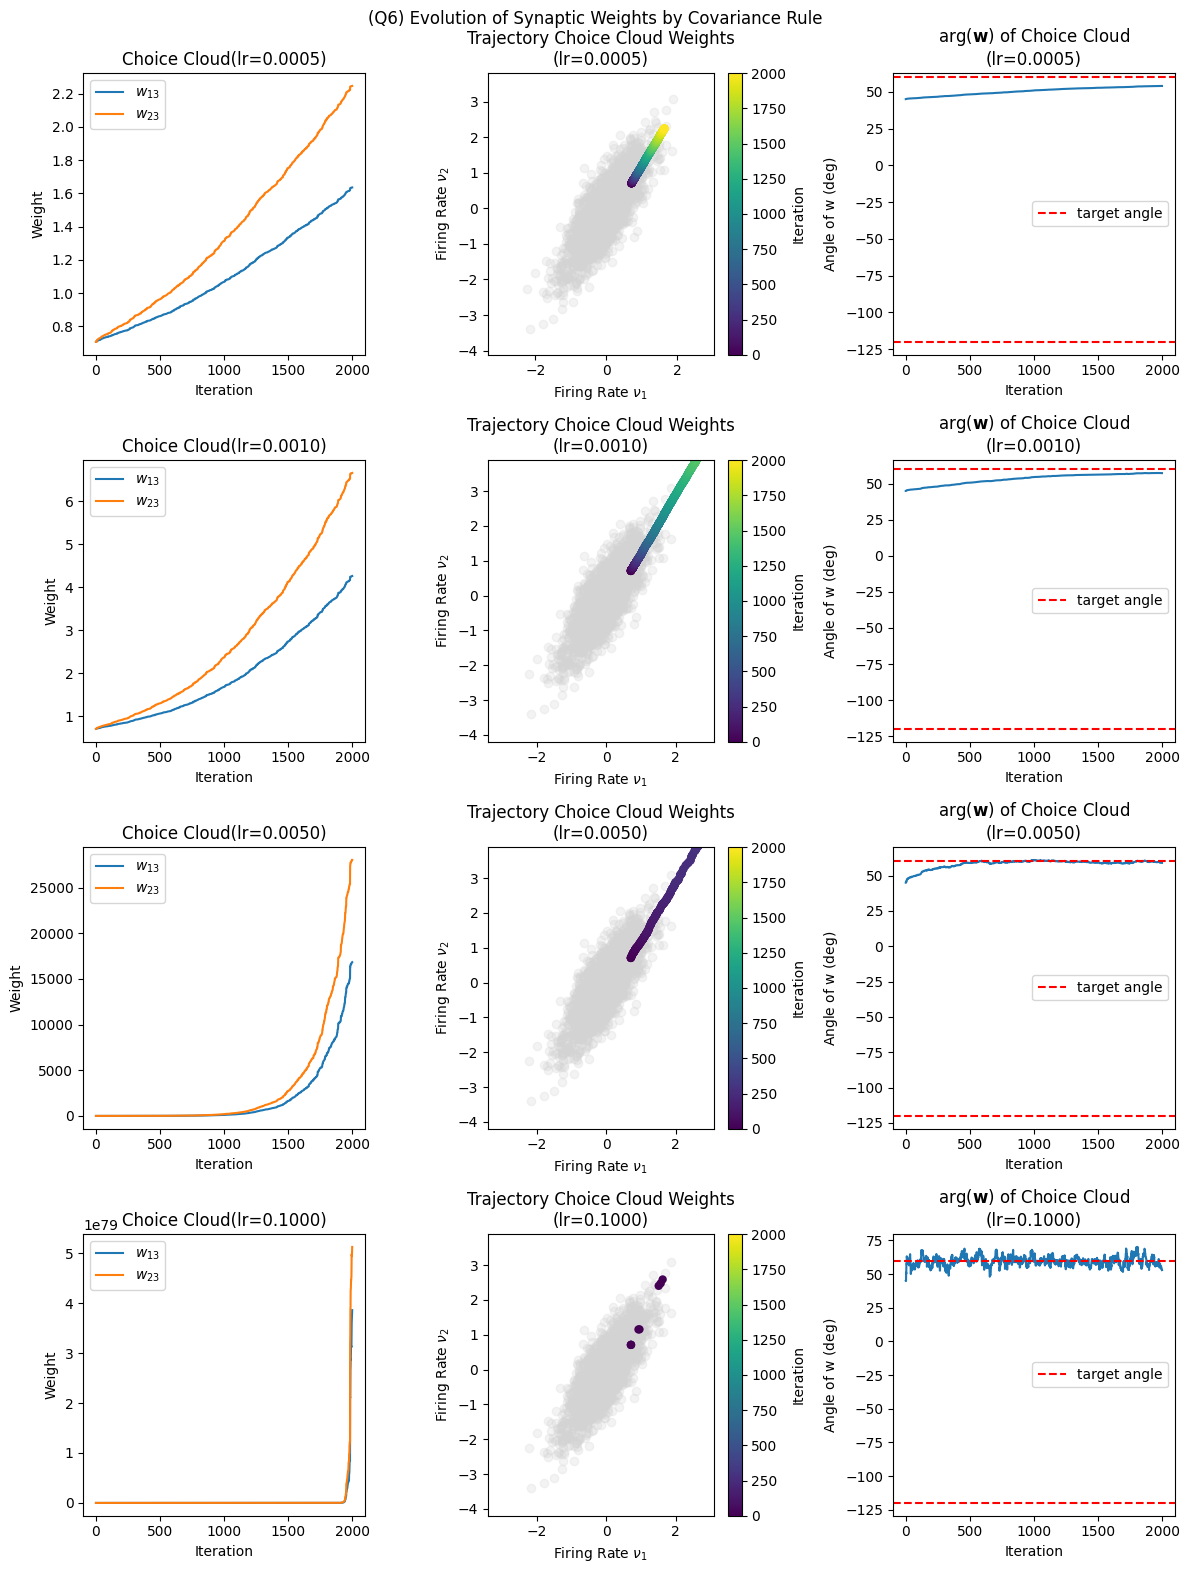

In [38]:
fig, axs = plt.subplots(1*len(learning_rates), 3, figsize = (12, 4*len(learning_rates)))

plt.suptitle('(Q6) Evolution of Synaptic Weights by Covariance Rule')

for i, ax in enumerate(axs):
    ax1, ax2, ax3 = ax

    w = sims[i]
    lr = learning_rates[i]
    
    plot_weights(w, ax1, title = 'Choice Cloud' + f'(lr={lr:.4f})')
    plot_trajectory(choice_cloud, w, ax2, title = 'Trajectory Choice Cloud Weights\n' + f'(lr={lr:.4f})')
    plot_angle(w, 60, ax = ax3, title = r'$\mathrm{arg}(\mathbf{w})$' + ' of Choice Cloud\n' + f'(lr={lr:.4f})')
    
# ax1.set_xlim((0,200))

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A6 conclusion** 

- The Covariance Rule is described as
  $$
    \dot{\mathbf{w}} = \eta(v-E(v)) \mathbf{u}.
  $$
  Where $ E(\cdot) $ is the expectation operator. Intuitively, this model strengthens patterns in $ \mathbf{u} $ that evoke higher activity than the expected activity $ E(v) $. Other patterns in $ \mathbf{u} $ are suppressed. In the plots above, you can observe that, in contrast to Oja's rule, the weight vector increases in both components $w_{13}$ and $w_{23}$ (there is no synaptic competition). This occurs according to the eigenvectors and eigenvalues of the autocovariance matrix of the inputs $\mathbf{u}$. Specifically, the autocovariance matrix of $\mathbf{u}$ amplifies different eigenpatterns in $\mathbf{w}$ based on their eigenvalues. The eigendirection parallel to the eigenvector $\mathbf{e}_1$ corresponding to the largest eigenvalue $\lambda_1 > \lambda_2$ will be amplified the most. Therefore, $\mathbf{w}$ explodes in the eigendirection corresponding to the highest eigenvalue.

- The condition for using a Covariance Learning Rule over Oja's Learning Rule is the absence of synaptic competition (see [A1](#A1)).

</span>